<a href="https://colab.research.google.com/github/mhyls26/CCMACLRL_EXERCISES_COM231ML/blob/main/Exercise5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 5: Create your own personal face recognition using SVM

## Instructions:

Create a directory in your google drive using this folder structure

```
My Drive
- Images
  - Train
    - Elizer
      - elizerimage1.jpg
      ...
    - Eliza
      - elizaimage1.jpg
      ...
    - Elijah
      - elijahimage1.jpg
      ...
  - Test
    - testimage1.jpg
    ...
```

- Upload 190 images of your self (selfied are recommended) in the Train folder
- Upload 190 images of your partner in the Train folder
- Upload 10 images each of yourself and your partner in the Test Folder (30 images total for each member)
- Use **.png** or **.jpg** or **.jpeg** images files

In [233]:
!pip install -q numpy opencv-python-headless scikit-learn matplotlib pillow joblib

## Import libraries

In [234]:
import os
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib

## Mount Google Drive

In [235]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1. Display one raw image directly from your drive



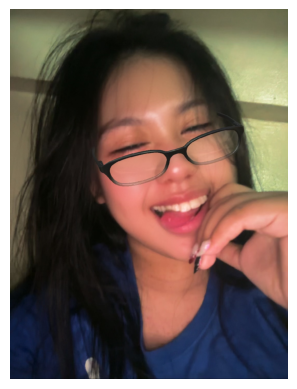

In [236]:
def display_image(path):
  image = Image.open(path)
  plt.imshow(image)
  plt.axis('off')
  plt.show()
display_image("/content/drive/MyDrive/Images/Train/cadiz/IMG_4475.jpg")

## 2. Load the images from your drive and apply preprocessing to your raw images

In [237]:
def load_images_from_folder(folder):
    images = []
    labels = []
    for label, person in enumerate(os.listdir(folder)):
        person_folder = os.path.join(folder, person)
        person_name = os.path.basename(person_folder)
        for filename in os.listdir(person_folder):
            img_path = os.path.join(person_folder, filename)
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
            img = cv2.resize(img, (100, 100))  # Resize to 100x100 pixels
            images.append(img.flatten())  # Flatten the image
            labels.append(person_name)
    return np.array(images), np.array(labels)

In [238]:
images, labels = load_images_from_folder('/content/drive/My Drive/Images/Train')

In [239]:
images.shape

(554, 10000)

In [240]:
labels.shape

(554,)

In [241]:
labels

array(['cadiz', 'cadiz', 'cadiz', 'cadiz', 'cadiz', 'cadiz', 'cadiz',
       'cadiz', 'cadiz', 'cadiz', 'cadiz', 'cadiz', 'cadiz', 'cadiz',
       'cadiz', 'cadiz', 'cadiz', 'cadiz', 'cadiz', 'cadiz', 'cadiz',
       'cadiz', 'cadiz', 'cadiz', 'cadiz', 'cadiz', 'cadiz', 'cadiz',
       'cadiz', 'cadiz', 'cadiz', 'cadiz', 'cadiz', 'cadiz', 'cadiz',
       'cadiz', 'cadiz', 'cadiz', 'cadiz', 'cadiz', 'cadiz', 'cadiz',
       'cadiz', 'cadiz', 'cadiz', 'cadiz', 'cadiz', 'cadiz', 'cadiz',
       'cadiz', 'cadiz', 'cadiz', 'cadiz', 'cadiz', 'cadiz', 'cadiz',
       'cadiz', 'cadiz', 'cadiz', 'cadiz', 'cadiz', 'cadiz', 'cadiz',
       'cadiz', 'cadiz', 'cadiz', 'cadiz', 'cadiz', 'cadiz', 'cadiz',
       'cadiz', 'cadiz', 'cadiz', 'cadiz', 'cadiz', 'cadiz', 'cadiz',
       'cadiz', 'cadiz', 'cadiz', 'cadiz', 'cadiz', 'cadiz', 'cadiz',
       'cadiz', 'cadiz', 'cadiz', 'cadiz', 'cadiz', 'cadiz', 'cadiz',
       'cadiz', 'cadiz', 'cadiz', 'cadiz', 'cadiz', 'cadiz', 'cadiz',
       'cadiz', 'cad

## 3. Display one pre-processed image from the training set

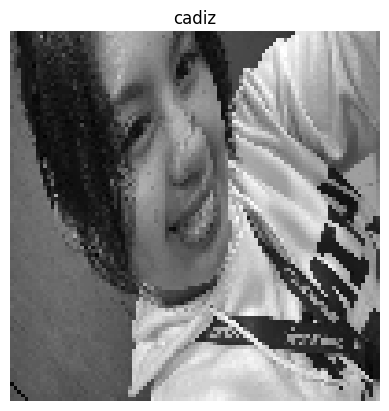

In [242]:
image = images[0].reshape(100,100)
name = labels[0]
plt.imshow(image, cmap="gray")
plt.title(name)
plt.axis('off')
plt.show()

## 4. Display ten pre-processed images from the training set

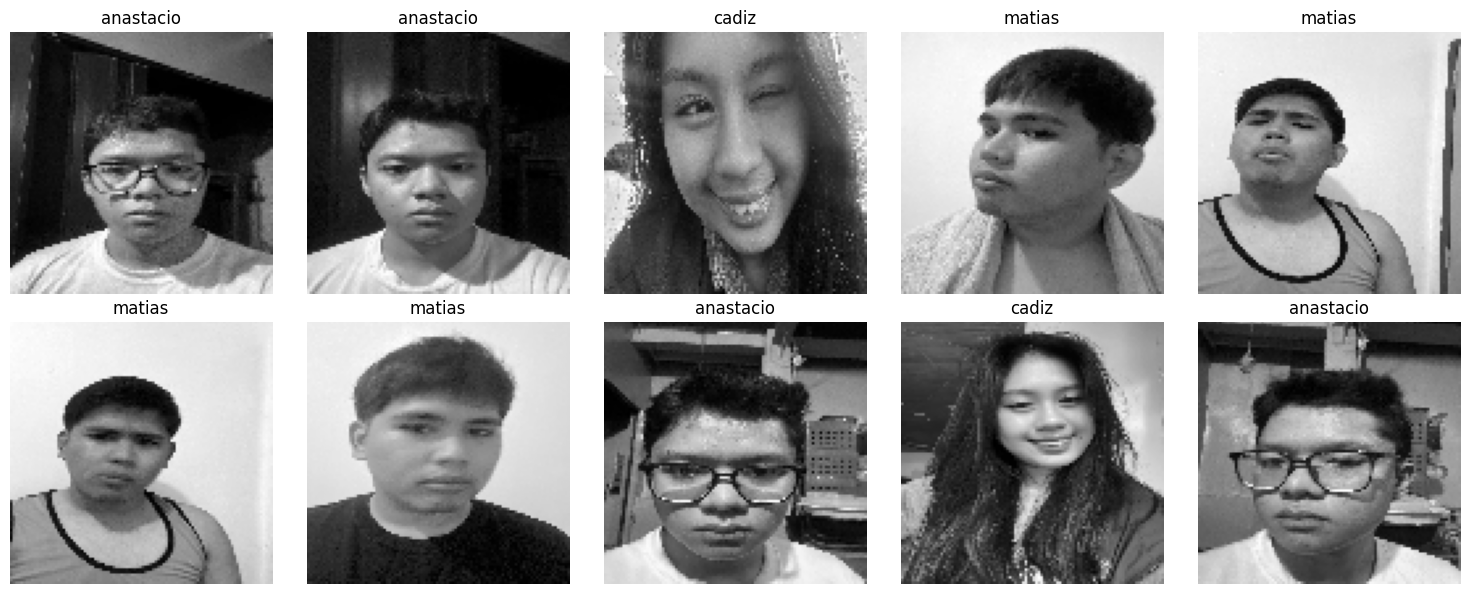

In [243]:
import random

num_faces = 10
idxs = random.sample(range(len(images)), num_faces)  # pick 10 random indices

fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.flatten()

for i, idx in enumerate(idxs):
    image = images[idx].reshape(100,100)
    name = labels[idx]
    axes[i].imshow(image, cmap='gray')
    axes[i].set_title(name)
    axes[i].axis("off")

plt.tight_layout()
plt.show()

## 5. Split your training data

In [244]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

## 6. Train your SVM model

In [245]:
model = svm.SVC(gamma='scale')
model.fit(X_train, y_train)

SVC()

## 7. Evaluate your SVM model

In [246]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 99.10%


## 8. Test your model using images not in your training set

Use your SVM model to predict the label of all of your images in the Test folder

In [247]:
def predict_image(img_path, model):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (100, 100)).flatten().reshape(1, -1)
    prediction = model.predict(img)
    return prediction

Predicted label: ['cadiz']


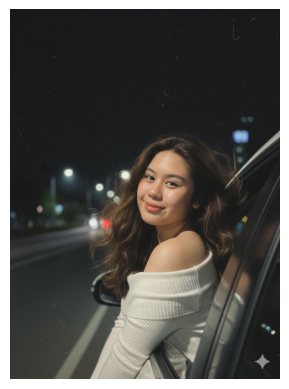

In [248]:
img_path1 = '/content/drive/My Drive/Images/Test/IMG_6420.PNG'
result1 = predict_image(img_path1, model)
print(f'Predicted label:', result1)
display_image(img_path1)

Predicted label: ['anastacio']


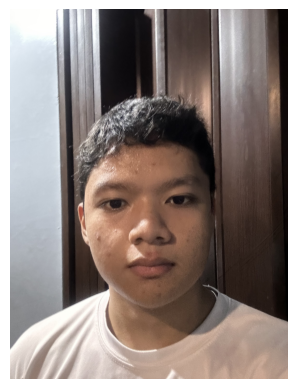

In [249]:
img_path1 = '/content/drive/My Drive/Images/Test/IMG_2999.jpg'
result1 = predict_image(img_path1, model)
print(f'Predicted label:', result1)
display_image(img_path1)

Predicted label: ['matias']


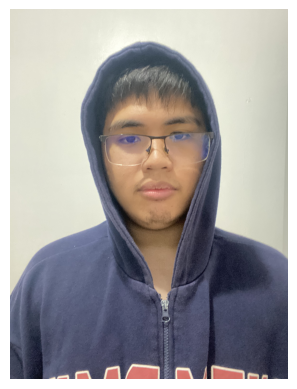

In [250]:
img_path1 = '/content/drive/My Drive/Images/Test/IMG_2784.jpg'
result1 = predict_image(img_path1, model)
print(f'Predicted label:', result1)
display_image(img_path1)